In [1]:
import os

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Adamax,SGD
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy

In [3]:
classes = os.listdir('/kaggle/input/paddy-plant-disease-dataset/train dataset12/test')
num_class=len(classes)
num_class

10

In [9]:
img=ImageDataGenerator(rescale=1./255)
#     ,rotation_range=25, width_shift_range=0.1,
#     height_shift_range=0.1, shear_range=0.2, 
#     zoom_range=0.2,horizontal_flip=True, 
#     fill_mode="nearest")
# from tensorflow.keras.applications.resnet50 import preprocess_input
# img = ImageDataGenerator(preprocessing_function=preprocess_input)
SEED = 42
BATCH_SIZE = 64
EPOCHS = 250
LEARNING_RATE = 0.13
IMAGE_SIZE = 224

INIT_LR = 1e-3

In [10]:
train_ds = img.flow_from_directory('/kaggle/input/paddy-plant-disease-dataset/train dataset12/train',
                                       target_size=(640,480),
                                       shuffle=True, 
                                       seed=SEED,
                                       class_mode='categorical',
                                       subset = 'training',
                                       batch_size=BATCH_SIZE,
                                       )

Found 7280 images belonging to 10 classes.


In [11]:
val_ds = img.flow_from_directory('/kaggle/input/paddy-plant-disease-dataset/train dataset12/val',
                                       target_size=(640,480),
                                       shuffle=True, 
                                       seed=SEED,
                                       class_mode='categorical',
                                       
                                       batch_size=BATCH_SIZE,
                                       )

Found 1036 images belonging to 10 classes.


In [12]:
test_ds = img.flow_from_directory('/kaggle/input/paddy-plant-disease-dataset/train dataset12/test',
                                       target_size=(640,480),
                                       shuffle=False, 
                                       seed=SEED,
                                       class_mode='categorical',
                                       batch_size=BATCH_SIZE,
                                       )

Found 2091 images belonging to 10 classes.


In [13]:

from tensorflow.keras.applications import InceptionV3
inc = InceptionV3(input_shape=(640,480,3),weights='imagenet',include_top=False)
for i in inc.layers:
    i.trainable = False

87910968/87910968 [==============================] - 5s 0us/step


In [14]:
model = tf.keras.models.Sequential([
    inc,
    tf.keras.layers.Conv2D(128, (3, 3), padding="same"),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(1024,activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 18, 13, 2048)      21802784  
                                                                 
 conv2d_94 (Conv2D)          (None, 18, 13, 128)       2359424   
                                                                 
 activation_94 (Activation)  (None, 18, 13, 128)       0         
                                                                 
 batch_normalization_94 (Bat  (None, 18, 13, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 9, 6, 128)         0

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])
callback2 = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', patience = 3, restore_best_weights = True)

In [17]:
history=model.fit(train_ds,validation_data=val_ds,epochs=40,callbacks = [callback2])

Epoch 1/40


2023-05-02 08:00:31.076666: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


114/114 [==============================] - 170s 1s/step - loss: 1.5279 - accuracy: 0.5055 - val_loss: 1.0413 - val_accuracy: 0.6496
Epoch 2/40
114/114 [==============================] - 136s 1s/step - loss: 0.6957 - accuracy: 0.7769 - val_loss: 0.7251 - val_accuracy: 0.7790
Epoch 3/40
114/114 [==============================] - 136s 1s/step - loss: 0.4281 - accuracy: 0.8698 - val_loss: 0.6030 - val_accuracy: 0.8195
Epoch 4/40
114/114 [==============================] - 136s 1s/step - loss: 0.2717 - accuracy: 0.9247 - val_loss: 0.5163 - val_accuracy: 0.8417
Epoch 5/40
114/114 [==============================] - 139s 1s/step - loss: 0.1856 - accuracy: 0.9536 - val_loss: 0.4463 - val_accuracy: 0.8639
Epoch 6/40
114/114 [==============================] - 135s 1s/step - loss: 0.1204 - accuracy: 0.9761 - val_loss: 0.3853 - val_accuracy: 0.8919
Epoch 7/40
114/114 [==============================] - 134s 1s/step - loss: 0.0891 - accuracy: 0.9865 - val_loss: 0.4300 - val_accuracy: 0.8591
Epoch 8/40

In [18]:
model.evaluate(test_ds)

33/33 [==============================] - 42s 1s/step - loss: 0.3365 - accuracy: 0.9034


[0.33645233511924744, 0.9033955335617065]

In [15]:
model.evaluate(test_ds)

33/33 [==============================] - 33s 983ms/step - loss: 0.4247 - accuracy: 0.8991


[0.42468971014022827, 0.899091362953186]

In [17]:
model.save('Inception1.h5')

metrics of xceptionV3


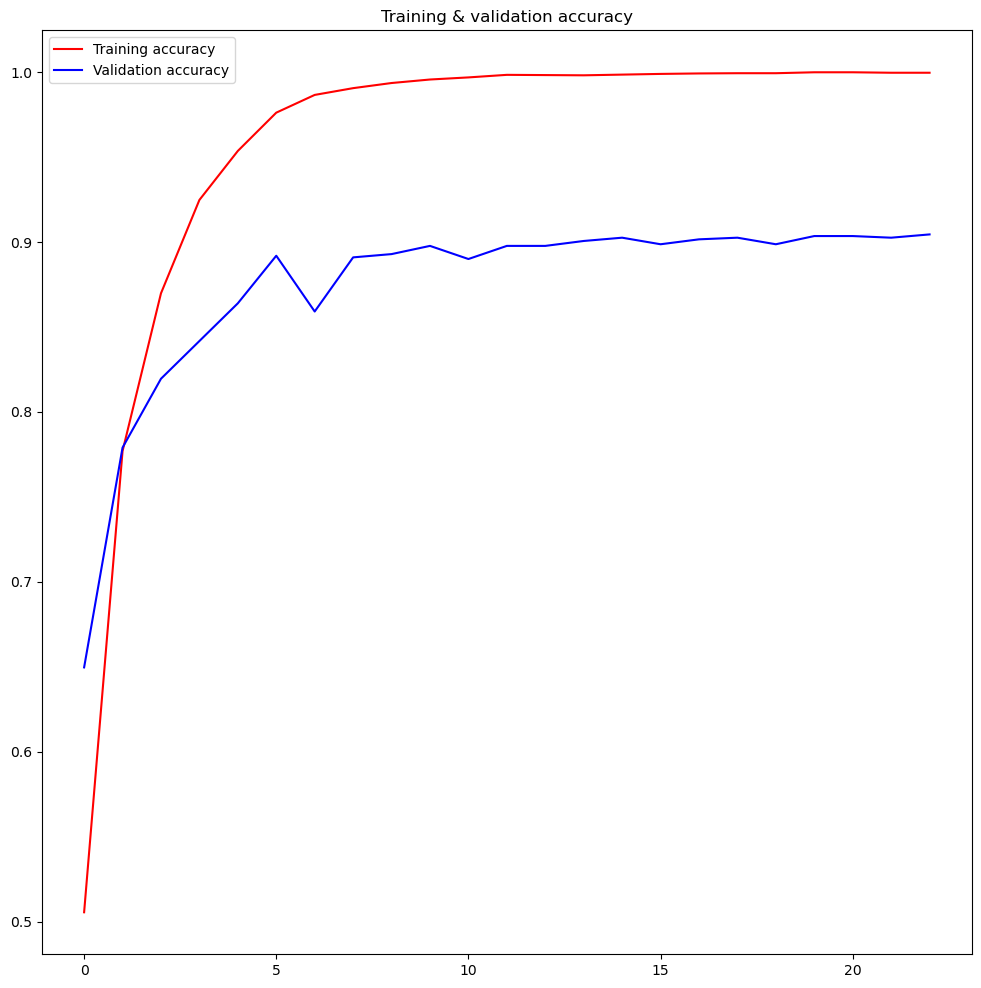

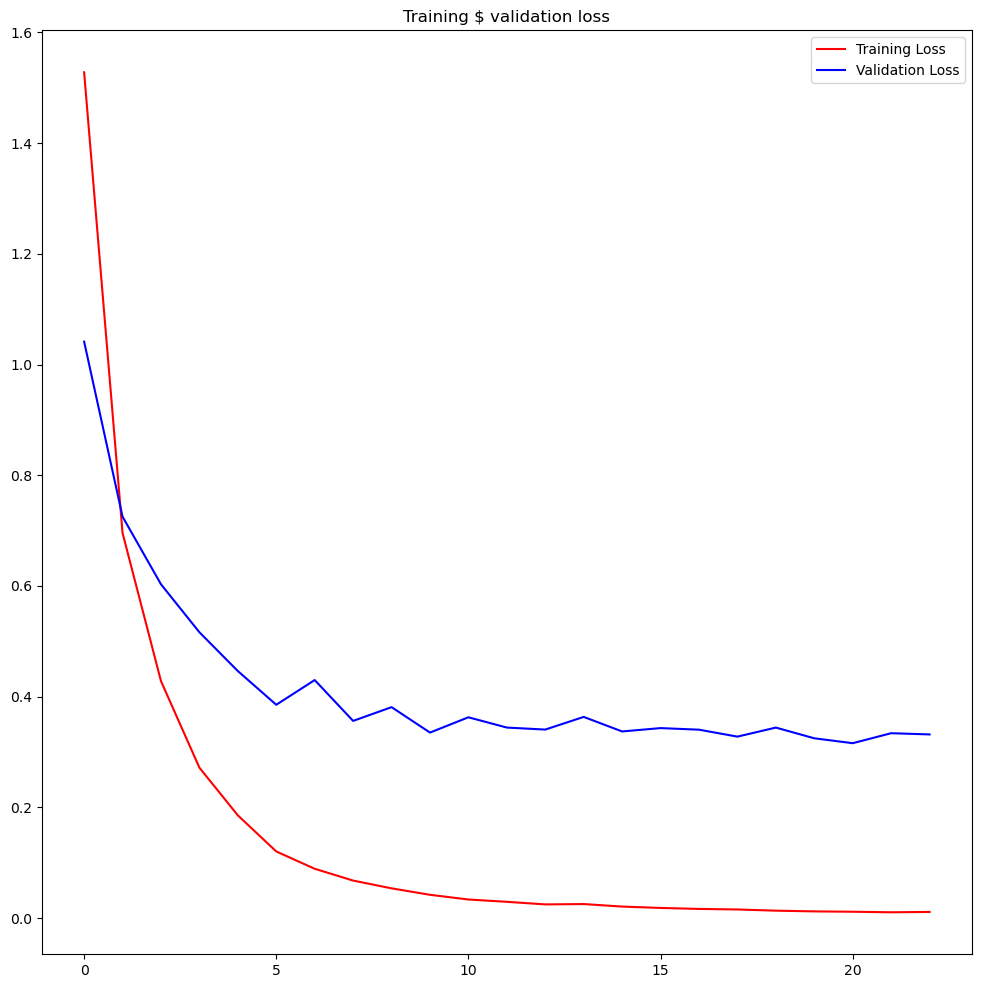

In [19]:
import matplotlib.pyplot as plt
print("metrics of xceptionV3")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12,12))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training & validation accuracy')
plt.legend()

plt.figure(figsize = (12,12))
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training $ validation loss')
plt.legend()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics

In [23]:
test_steps_per_epoch = np.math.ceil(test_ds.samples / test_ds.batch_size)

predictions = model.predict(test_ds, steps = test_steps_per_epoch)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_ds.classes
class_labels = list(test_ds.class_indices.keys())
report = sklearn.metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report) 

33/33 [==============================] - 32s 973ms/step
                          precision    recall  f1-score   support

   bacterial_leaf_blight       0.86      0.77      0.82        97
   bacterial_leaf_streak       0.96      0.86      0.90        76
bacterial_panicle_blight       0.89      0.93      0.91        69
                   blast       0.87      0.93      0.90       349
              brown_spot       0.86      0.89      0.88       194
              dead_heart       0.96      0.93      0.95       289
            downy_mildew       0.90      0.81      0.86       124
                   hispa       0.88      0.93      0.90       320
                  normal       0.94      0.90      0.92       354
                  tungro       0.91      0.91      0.91       219

                accuracy                           0.90      2091
               macro avg       0.90      0.89      0.89      2091
            weighted avg       0.90      0.90      0.90      2091



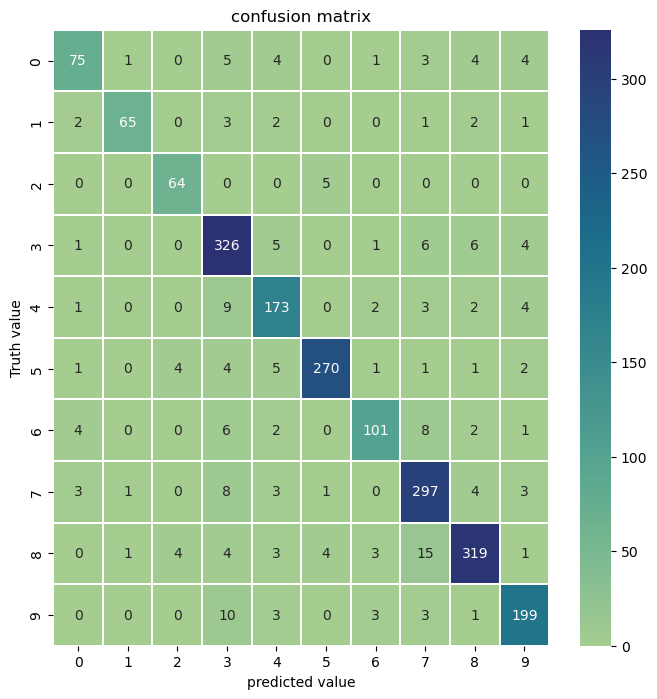

[[ 75   1   0   5   4   0   1   3   4   4]
 [  2  65   0   3   2   0   0   1   2   1]
 [  0   0  64   0   0   5   0   0   0   0]
 [  1   0   0 326   5   0   1   6   6   4]
 [  1   0   0   9 173   0   2   3   2   4]
 [  1   0   4   4   5 270   1   1   1   2]
 [  4   0   0   6   2   0 101   8   2   1]
 [  3   1   0   8   3   1   0 297   4   3]
 [  0   1   4   4   3   4   3  15 319   1]
 [  0   0   0  10   3   0   3   3   1 199]]


In [24]:
cm = sklearn.metrics.confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8,8))
sns.heatmap(cm, fmt='.0f', cmap="crest", annot=True, linewidths=0.2 )
plt.title('confusion matrix')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()
print(sklearn.metrics.confusion_matrix(true_classes, predicted_classes))


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


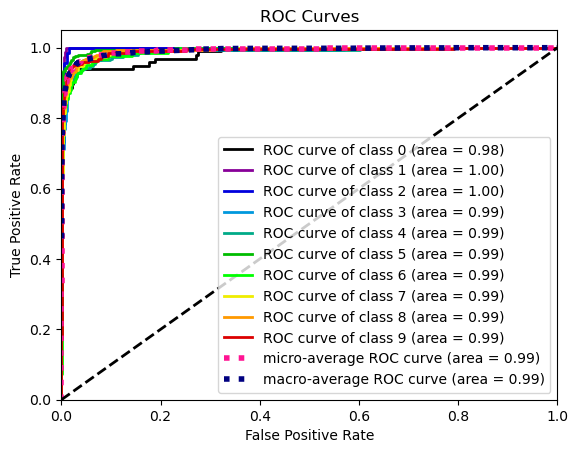

In [25]:
import scikitplot as skplt

y_true = true_classes
y_probas = predictions
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()